In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create random distribution of 2 classes (0 and 1)

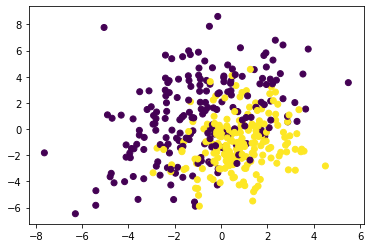

In [9]:
N = 200

mean1 = np.array([-1, 1])
mean2 = np.array([1, -1])

sig1 = np.array([[5, 3], [3, 9]])
sig2 = np.array([[2, 0.5], [0.5, 4]])

X = list()
y = list()
for _ in range(N):
    # First class 2D points 
    X.append(np.random.multivariate_normal(mean1, sig1))
    y.append(0)
    
    # Second class 2D points
    X.append(np.random.multivariate_normal(mean2, sig2))
    y.append(1)

X = np.array(X)
y = np.array(y)

plt.scatter(X[:,0], X[:,1], c=y)

## Determ the most effective amount of neigbors in KNeighborsClassifier 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Best score: 54, best accuracy: 0.8409090909090909


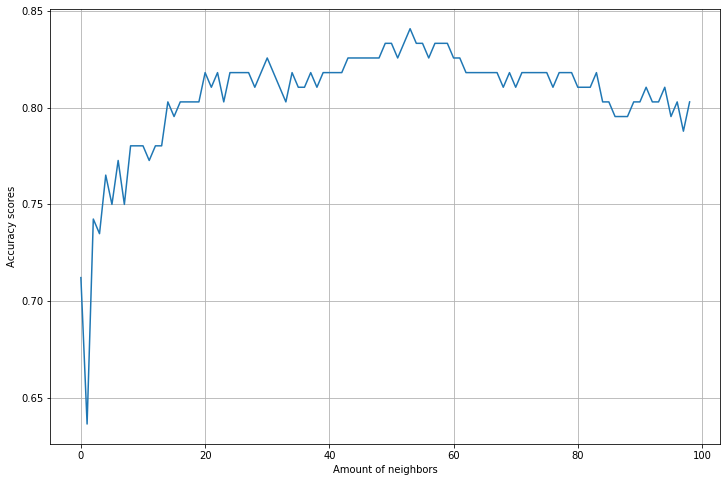

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

best_n = 0
best_acc_score = 0
acc_scores = list()
for p in range(1, 100):
    k = KNeighborsClassifier(n_neighbors=p)
    k.fit(X_train, y_train)
    
    acc_score = accuracy_score(k.predict(X_test), y_test)
    acc_scores.append(acc_score)
    
    if acc_score > best_acc_score:
        best_n = p
        best_acc_score = acc_score
    
print(f'Best score: {best_n}, best accuracy: {best_acc_score}')

plt.figure(figsize=(12, 8))
plt.plot(acc_scores)
plt.xlabel('Amount of neighbors')
plt.ylabel('Accuracy scores')
plt.grid(True)
plt.show()

## Plot mesh grid

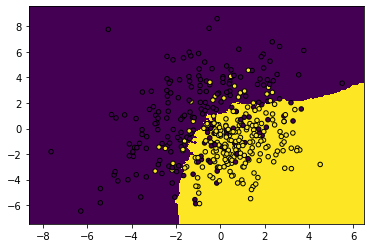

In [26]:
h = 0.05 # Grid spacing
k = KNeighborsClassifier(n_neighbors=best_n)
k.fit(X_train, y_train)

# Determ plot's boundaries
X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Get node's coordinates in mesh grid
X_, y_ = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))

X_flatten = X_.ravel()
y_flatten = y_.ravel()

# Based on Z color is determed
Z = k.predict(np.c_[X_flatten, y_flatten])
Z = Z.reshape(X_.shape)

plt.figure()
plt.pcolormesh(X_, y_, Z)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', s=20)

## Make handwritten digits classifier

In [29]:
from sklearn.datasets import fetch_openml

In [30]:
# Fetch dataset with handwritten digits
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

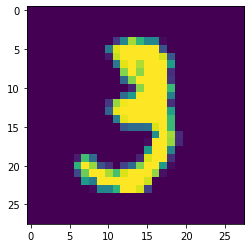

In [31]:
# Look at 10th element in fetched database
plt.imshow(X[10].reshape((28, 28)))

In [33]:
# Divide train and test samples
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=1000)

# Create and fit 5_neigbors classifier
k = KNeighborsClassifier(n_neighbors=5)
k.fit(X_train, y_train)

# Check accuracy
print(accuracy_score(k.predict(X_test), y_test))

0.953
